In [ ]:
!pip install yfinance



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
import os
import yfinance as yf


#Plotly Method Imports
import plotly # You can use matplotlib as well for these plots as well
import cufflinks as cf 
cf.go_offline()

In [2]:
import pandas as pd
import altair as alt
pd.__version__

'1.1.3'

In [3]:
import datetime

now = datetime.datetime.now()
print("Last updated:", now.strftime("%Y-%m-%d" + " at "+ "%H:%M:%S"))

Last updated: 2022-08-02 at 17:31:15


## Load data set with the "Open" and "High" columns to use in our modeling.

In [4]:
start = datetime.datetime(2012, 12, 29) # START ON January 1 2016
##end = datetime.datetime(2020,2,15)
end = datetime.date.today() # LOOK AT STOCKS TILL current date

tickers = ['TSLA','AAPL']
df_map = {}

for tick in tickers:
    data_source='google'
    stock =yf.download(tick,start, end)
    df_map[tick] = stock

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
TSLA_AAPL_stocks = pd.concat(df_map,axis = 1,keys = tickers)
TSLA_AAPL_stocks.tail()

TSLA                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2022-07-26  799.539978  801.929993  768.789978  776.580017  776.580017   
2022-07-27  791.429993  827.780029  785.369995  824.460022  824.460022   
2022-07-28  840.200012  849.900024  818.400024  842.700012  842.700012   
2022-07-29  842.099976  894.960022  837.299988  891.450012  891.450012   
2022-08-01  903.830017  935.630005  885.000000  891.830017  891.830017   

                            AAPL                                      \
              Volume        Open        High         Low       Close   
Date                                                                   
2022-07-26  22273600  152.259995  153.089996  150.800003  151.600006   
2022-07-27  29370000  152.580002  157.330002  152.160004  156.789993   
2022-07-28  28241000  156.979996  157.639999  154.410004  157.350006   
2022-07-29  31771000  161.240005  163.630005  159.500000  162.509995   
2022-08-01  39014300  161.009995  163.589996  160.889999  161.509995   

                                   
             Adj Close     Volume  
Date                               
2022-07-26  151.600006   55138700  
2022-07-27  156.789993   78620700  
2022-07-28  157.350006   81378700  
2022-07-29  162.509995  101689200  
2022-08-01  161.509995   67829400

In [6]:
TSLA_AAPL = pd.DataFrame(TSLA_AAPL_stocks) #KO_PEP_stocks dataframe
for tick in tickers:
    TSLA_AAPL[tick+' Return'] = TSLA_AAPL_stocks[tick]['Close'].pct_change()
TSLA_AAPL.head()

TSLA                                               AAPL  \
             Open   High    Low  Close Adj Close   Volume       Open   
Date                                                                   
2012-12-31  6.600  6.794  6.600  6.774     6.774  2974500  18.233213   
2013-01-02  7.000  7.090  6.942  7.072     7.072  5974000  19.779285   
2013-01-03  7.036  7.090  6.950  6.954     6.954  3710000  19.567142   
2013-01-04  6.960  6.960  6.784  6.880     6.880  3370000  19.177500   
2013-01-07  6.960  6.960  6.780  6.868     6.868  2210000  18.642857   

                                                                  TSLA Return  \
                 High        Low      Close  Adj Close     Volume               
Date                                                                            
2012-12-31  19.121429  18.178572  19.006071  16.394844  659492400         NaN   
2013-01-02  19.821428  19.343929  19.608213  16.914259  560518000    0.043992   
2013-01-03  19.631071  19.321428  19.360714  16.700762  352965200   -0.016686   
2013-01-04  19.236786  18.779642  18.821428  16.235567  594333600   -0.010641   
2013-01-07  18.903570  18.400000  18.710714  16.140066  484156400   -0.001744   

           AAPL Return  
                        
Date                    
2012-12-31         NaN  
2013-01-02    0.031682  
2013-01-03   -0.012622  
2013-01-04   -0.027855  
2013-01-07   -0.005882

In [7]:
TSLA_AAPL.columns = ['TSLA_Open','TSLA_High','TSLA_Low','TSLA_Close','TSLA_AdjClose','TSLA_Volume',
                  'AAPL_Open','AAPL_High','AAPL_Low','AAPL_Close','AAPL_AdjClose','AAPL_Volume', 'TSLA_Return', 'AAPL_Return']

TSLA_AAPL.head()

,TSLA_Open,TSLA_High,TSLA_Low,TSLA_Close,TSLA_AdjClose,TSLA_Volume,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_AdjClose,AAPL_Volume,TSLA_Return,AAPL_Return
Date,,,,,,,,,,,,,,
2012-12-31,6.600,6.794,6.600,6.774,6.774,2974500,18.233213,19.121429,18.178572,19.006071,16.394844,659492400,NaN,NaN
2013-01-02,7.000,7.090,6.942,7.072,7.072,5974000,19.779285,19.821428,19.343929,19.608213,16.914259,560518000,0.043992,0.031682
2013-01-03,7.036,7.090,6.950,6.954,6.954,3710000,19.567142,19.631071,19.321428,19.360714,16.700762,352965200,-0.016686,-0.012622
2013-01-04,6.960,6.960,6.784,6.880,6.880,3370000,19.177500,19.236786,18.779642,18.821428,16.235567,594333600,-0.010641,-0.027855
2013-01-07,6.960,6.960,6.780,6.868,6.868,2210000,18.642857,18.903570,18.400000,18.710714,16.140066,484156400,-0.001744,-0.005882


In [14]:
## CLOSING PRICE
price = alt.Chart(TSLA_AAPL.reset_index()).mark_line().encode(
    alt.X("Date", title = "Date"),
    alt.Y("TSLA_Close", title = "Closing"),
    tooltip= ['Date', 'TSLA_Open', 'TSLA_Close', 'TSLA_High', 'TSLA_Low', 'TSLA_Volume']
).properties(
    width=900, height=200
)

price

alt.Chart(...)

In [15]:
## CLOSING PRICE
price = alt.Chart(TSLA_AAPL.reset_index()).mark_line().encode(
    alt.X("Date", title = "Date"),
    alt.Y("AAPL_Close", title = "Closing"),
    tooltip= ['Date', 'AAPL_Open', 'AAPL_Close', 'AAPL_High', 'AAPL_Low', 'AAPL_Volume']
).properties(
    width=900, height=200
)

price

alt.Chart(...)

## JUST LOOKING AT KO - TRAINING DATA

In [126]:
start = datetime.datetime(2014, 1, 1) # START ON January 1 2016
end = datetime.datetime(2020,2,20)
##end = datetime.date.today() # LOOK AT STOCKS TILL current date

tickers = ['AAPL']
df_map = {}

for tick in tickers:
    data_source='google'
    stock =yf.download(tick,start, end)
    df_map[tick] = stock

[*********************100%***********************]  1 of 1 completed


In [127]:
KO_Training = pd.concat(df_map,axis = 1,keys = tickers)
KO_Training.tail()

AAPL                                                       
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-02-12  80.367500  81.805000  80.367500  81.800003  80.572838  113730400
2020-02-13  81.047501  81.555000  80.837502  81.217499  79.999062   94747600
2020-02-14  81.184998  81.495003  80.712502  81.237503  80.018768   80113600
2020-02-18  78.839996  79.937500  78.652496  79.750000  78.553589  152531200
2020-02-19  80.000000  81.142502  80.000000  80.904999  79.691261   93984000

In [128]:
KO_Training = pd.DataFrame(KO_Training) #KO_PEP_stocks dataframe
for tick in tickers:
    KO_Training[tick+' Return'] = KO_Training[tick]['Close'].pct_change()
KO_Training.head()

AAPL                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2014-01-02  19.845715  19.893929  19.715000  19.754642  17.468649  234684800   
2014-01-03  19.745001  19.775000  19.301071  19.320715  17.084938  392467600   
2014-01-06  19.194643  19.528570  19.057142  19.426071  17.178104  412610800   
2014-01-07  19.440001  19.498571  19.211430  19.287144  17.055244  317209200   
2014-01-08  19.243214  19.484285  19.238930  19.409286  17.163258  258529600   

           AAPL Return  
                        
Date                    
2014-01-02         NaN  
2014-01-03   -0.021966  
2014-01-06    0.005453  
2014-01-07   -0.007152  
2014-01-08    0.006333

In [129]:
KO_Training.columns = ['AAPL_Open','AAPL_High','AAPL_Low','AAPL_Close','AAPL_AdjClose','AAPL_Volume', 'AAPL_Return']

KO_Training.head()

,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_AdjClose,AAPL_Volume,AAPL_Return
Date,,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.468649,234684800,NaN
2014-01-03,19.745001,19.775000,19.301071,19.320715,17.084938,392467600,-0.021966
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.178104,412610800,0.005453
2014-01-07,19.440001,19.498571,19.211430,19.287144,17.055244,317209200,-0.007152
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.163258,258529600,0.006333


In [130]:
## CLOSING PRICE
Closing_Price = alt.Chart(KO_Training.reset_index()).mark_line().encode(
    alt.X("Date", title = "Date"),
    alt.Y("AAPL_AdjClose", title = "Closing"),
    tooltip= ['Date', 'AAPL_Open', 'AAPL_Close', 'AAPL_High', 'AAPL_Low', 'AAPL_Volume']
).properties(
    width=900, height=200
)

Closing_Price

alt.Chart(...)

In [131]:
KO_Training.to_csv('KO_Training.csv')


In [132]:
len(KO_Training)

1543

## TEST DATA 

In [133]:
start = datetime.datetime(2020, 2, 21) # START ON January 1 2016
end = datetime.datetime(2020,3,20)
##end = datetime.date.today() # LOOK AT STOCKS TILL current date

tickers = ['AAPL']
df_map = {}

for tick in tickers:
    data_source='google'
    stock =yf.download(tick,start, end)
    df_map[tick] = stock

[*********************100%***********************]  1 of 1 completed


In [134]:
KO_TEST = pd.concat(df_map,axis = 1,keys = tickers)
KO_TEST.tail()

AAPL                                                       
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-03-13  66.222504  69.980003  63.237499  69.492500  68.449966  370732000
2020-03-16  60.487499  64.769997  60.000000  60.552502  59.644085  322423600
2020-03-17  61.877499  64.402496  59.599998  63.215000  62.266640  324056000
2020-03-18  59.942501  62.500000  59.279999  61.667500  60.742359  300233600
2020-03-19  61.847500  63.209999  60.652500  61.195000  60.276943  271857200

In [135]:
KO_TEST = pd.DataFrame(KO_TEST) #KO_PEP_stocks dataframe
for tick in tickers:
    KO_TEST[tick+' Return'] = KO_TEST[tick]['Close'].pct_change()
KO_TEST.head()

AAPL                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2020-02-21  79.654999  80.112503  77.625000  78.262497  77.088402  129554000   
2020-02-24  74.315002  76.044998  72.307503  74.544998  73.426674  222195200   
2020-02-25  75.237503  75.632500  71.532501  72.019997  70.939537  230673600   
2020-02-26  71.632500  74.470001  71.625000  73.162498  72.064911  198054800   
2020-02-27  70.275002  71.500000  68.239998  68.379997  67.354149  320605600   

           AAPL Return  
                        
Date                    
2020-02-21         NaN  
2020-02-24   -0.047500  
2020-02-25   -0.033872  
2020-02-26    0.015864  
2020-02-27   -0.065368

In [136]:
KO_TEST.columns = ['AAPL_Open','AAPL_High','AAPL_Low','AAPL_Close','AAPL_AdjClose','AAPL_Volume', 'AAPL_Return']

KO_TEST.head()

,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_AdjClose,AAPL_Volume,AAPL_Return
Date,,,,,,,
2020-02-21,79.654999,80.112503,77.625000,78.262497,77.088402,129554000,NaN
2020-02-24,74.315002,76.044998,72.307503,74.544998,73.426674,222195200,-0.047500
2020-02-25,75.237503,75.632500,71.532501,72.019997,70.939537,230673600,-0.033872
2020-02-26,71.632500,74.470001,71.625000,73.162498,72.064911,198054800,0.015864
2020-02-27,70.275002,71.500000,68.239998,68.379997,67.354149,320605600,-0.065368


In [137]:
## CLOSING PRICE
Closing_Price = alt.Chart(KO_TEST.reset_index()).mark_line().encode(
    alt.X("Date", title = "Date"),
    alt.Y("AAPL_AdjClose", title = "Closing"),
    tooltip= ['Date', 'AAPL_Open', 'AAPL_Close', 'AAPL_High', 'AAPL_Low', 'AAPL_Volume']
).properties(
    width=900, height=200
)

Closing_Price

alt.Chart(...)

In [138]:
KO_TEST.to_csv('KO_TEST.csv')


In [139]:
len(KO_TEST)

20

# LSTM

In [140]:
dataset_train = pd.read_csv('KO_Training.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [141]:
dataset_train.tail()

,Date,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_AdjClose,AAPL_Volume,AAPL_Return
1538,2020-02-12,80.367500,81.805000,80.367500,81.800003,80.572838,113730400,0.023748
1539,2020-02-13,81.047501,81.555000,80.837502,81.217499,79.999062,94747600,-0.007121
1540,2020-02-14,81.184998,81.495003,80.712502,81.237503,80.018768,80113600,0.000246
1541,2020-02-18,78.839996,79.937500,78.652496,79.750000,78.553589,152531200,-0.018311
1542,2020-02-19,80.000000,81.142502,80.000000,80.904999,79.691261,93984000,0.014483


In [142]:
#Import MinMaxScaler from scikit-learn to scale our dataset into numbers between 0 and 1


In [143]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

We want our data to be in the form of a 3D array for our LSTM model. First, we create data in 60 timesteps and convert it into an array using NumPy. Then, we convert the data into a 3D array with X_train samples, 60 timestamps, and one feature at each step.

In [144]:
X_train = []
y_train = []
for i in range(60, 1543):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [145]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense 

Add LSTM layer along with dropout layers to prevent overfitting. After that, we add a Dense layer that specifies a one unit output. Next, we compile the model using the adam optimizer and set the loss as the mean_squarred_error

In [146]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
47/47 [==============================] - 11s 74ms/step - loss: 0.0177
Epoch 2/50
47/47 [==============================] - 3s 67ms/step - loss: 0.0031
Epoch 3/50
47/47 [==============================] - 3s 68ms/step - loss: 0.0025
Epoch 4/50
47/47 [==============================] - 3s 70ms/step - loss: 0.0025
Epoch 5/50
47/47 [==============================] - 3s 72ms/step - loss: 0.0022
Epoch 6/50
47/47 [==============================] - 3s 69ms/step - loss: 0.0022
Epoch 7/50
47/47 [==============================] - 3s 68ms/step - loss: 0.0018
Epoch 8/50
47/47 [==============================] - 4s 77ms/step - loss: 0.0018
Epoch 9/50
47/47 [==============================] - 4s 77ms/step - loss: 0.0019
Epoch 10/50
47/47 [==============================] - 4s 80ms/step - loss: 0.0019
Epoch 11/50
47/47 [==============================] - 4s 74ms/step - loss: 0.0017
Epoch 12/50
47/47 [==============================] - 4s 77ms/step - loss: 0.0021
Epoch 13/50
47/47 [=================

## Import the test set for the model to make predictions on 

In [147]:
dataset_test = pd.read_csv('KO_TEST.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [148]:
len(KO_TEST)

20

Before predicting future stock prices, we have to manipulate the training set; we merge the training set and the test set on the 0 axis, set the time step to 60, use minmaxscaler, and reshape the dataset as done previously. After making predictions, we use inverse_transform to get back the stock prices in normal readable format.

## ADJUSTED CLOSING PRICE VS CLOSING PRICE

In [149]:
dataset_total_adj = pd.concat((dataset_train['AAPL_AdjClose'], dataset_test['AAPL_AdjClose']), axis = 0)
inputs = dataset_total_adj[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
##y_test = 
for i in range(60, 79):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [150]:
dataset_total_adj

0     17.468649
1     17.084938
2     17.178104
3     17.055244
4     17.163258
        ...    
15    68.449966
16    59.644085
17    62.266640
18    60.742359
19    60.276943
Name: AAPL_AdjClose, Length: 1563, dtype: float64

In [151]:
rsme = np.sqrt(np.mean(((predicted_stock_price-KO_TEST)**2)))
rsme

ValueError: Unable to coerce to DataFrame, shape must be (20, 7): given (19, 1)

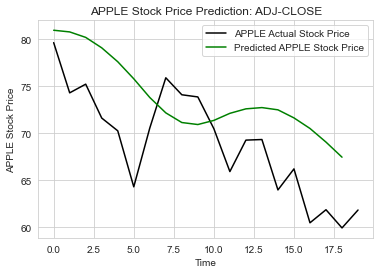

In [152]:
plt.plot(real_stock_price, color = 'black', label = 'APPLE Actual Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted APPLE Stock Price')
plt.title('APPLE Stock Price Prediction: ADJ-CLOSE')
plt.xlabel('Time')
plt.ylabel('APPLE Stock Price')
plt.legend()
plt.show()

In [153]:
dataset_total_close = pd.concat((dataset_train['AAPL_Close'], dataset_test['AAPL_Close']), axis = 0)
inputs = dataset_total_close[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [154]:
dataset_total_close

0     19.754642
1     19.320715
2     19.426071
3     19.287144
4     19.409286
        ...    
15    69.492500
16    60.552502
17    63.215000
18    61.667500
19    61.195000
Name: AAPL_Close, Length: 1563, dtype: float64

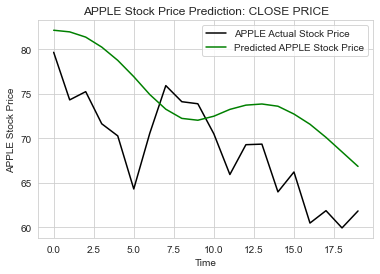

In [155]:
plt.plot(real_stock_price, color = 'black', label = 'APPLE Actual Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted APPLE Stock Price')
plt.title('APPLE Stock Price Prediction: CLOSE PRICE')
plt.xlabel('Time')
plt.ylabel('APPLE Stock Price')
plt.legend()
plt.show()